<a href="https://colab.research.google.com/github/Hrygt/SmartThingsPublic/blob/master/Digit_Recognizer_Module_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import tensorflow
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, Flatten

In [70]:
# Load the training data
train_data = pd.read_csv('train.csv')
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

In [71]:
X_train.shape

(42000, 784)

In [72]:
y_train.shape

(42000,)

In [73]:
# Normalize the Training Data
X_train = X_train / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
# y_train = keras.utils.to_categorical(y_train, num_classes=10)

In [74]:
y_train.shape

(42000,)

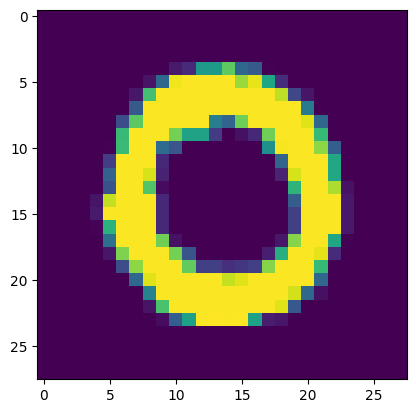

In [75]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [76]:
# Load the Test Data
X_test = pd.read_csv('test.csv').values
X_test = X_test / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)

In [77]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [78]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 64)                16448     
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 219818 (858.66 KB)
Trainable params: 219818 (858.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [80]:
# Fit the model
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)


Epoch 1/15
1050/1050 [==============================] - 5s 4ms/step - loss: 0.2940 - accuracy: 0.9100 - val_loss: 0.1467 - val_accuracy: 0.9554
Epoch 2/15
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1146 - accuracy: 0.9649 - val_loss: 0.1148 - val_accuracy: 0.9655
Epoch 3/15
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0748 - accuracy: 0.9763 - val_loss: 0.1019 - val_accuracy: 0.9680
Epoch 4/15
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0568 - accuracy: 0.9818 - val_loss: 0.1225 - val_accuracy: 0.9632
Epoch 5/15
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0431 - accuracy: 0.9862 - val_loss: 0.1168 - val_accuracy: 0.9675
Epoch 6/15
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0339 - accuracy: 0.9891 - val_loss: 0.0950 - val_accuracy: 0.9755
Epoch 7/15
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0303 - accuracy: 0.9900 - val_loss: 0.1131 - val_accuracy:

In [81]:
# Predict on test set
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

875/875 [==============================] - 1s 2ms/step


In [82]:
y_prob

array([[7.64937081e-20, 1.00189455e-21, 9.99999940e-01, ...,
        4.98168895e-17, 2.70018118e-18, 9.28072136e-23],
       [9.99999940e-01, 1.12896945e-19, 2.06331144e-14, ...,
        2.53579331e-17, 2.63985552e-11, 7.12173213e-13],
       [1.12419405e-12, 9.48420370e-11, 1.38069126e-10, ...,
        4.11383194e-09, 3.74554224e-06, 9.99988019e-01],
       ...,
       [3.93048211e-24, 1.94401257e-20, 1.81759633e-15, ...,
        1.91281510e-20, 2.60204630e-16, 1.06755056e-11],
       [1.56945817e-10, 2.23119870e-10, 9.04860492e-11, ...,
        7.79470710e-10, 1.05603135e-08, 9.99998510e-01],
       [1.08826945e-19, 1.03736545e-18, 9.99999940e-01, ...,
        8.01811213e-15, 4.01120882e-20, 6.22477077e-23]], dtype=float32)

In [83]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

ValueError: Found input variables with inconsistent numbers of samples: [10000, 28000]

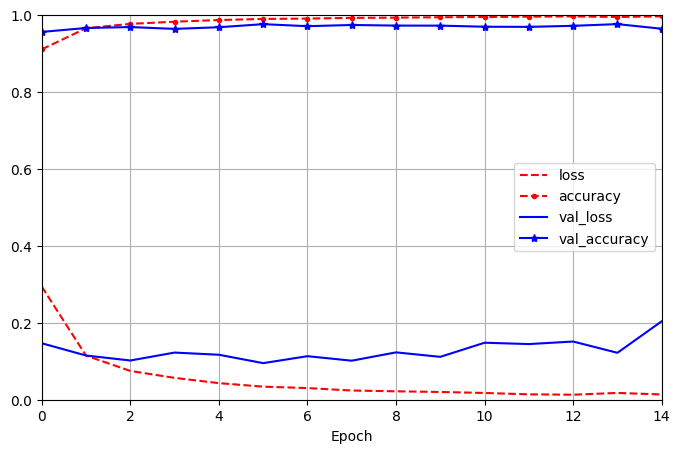

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 14], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()



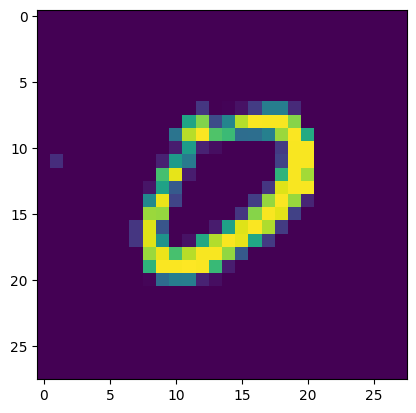

In [85]:
# I use this to input individual numbers on the test data set to see what my model predicts.
tester = 3
plt.imshow(X_test[tester])

In [86]:
model.predict(X_test[tester].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 67ms/step


array([9])

In [87]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'ImageId': range(1, len(y_pred) + 1),
    'Label': y_pred
})


In [88]:
# Save to CSV, without the index column
submission.to_csv('submission.csv', index=False)

Ths got me a 97% accuracy when I turned in my Kaggle submission.  I see the names of all of my classmates just above my name.  

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [92]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')

])

In [93]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)        

In [94]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [95]:
# Fit the model
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1050/1050 [==============================] - 10s 9ms/step - loss: 0.2611 - accuracy: 0.9203 - val_loss: 0.1180 - val_accuracy: 0.9632
Epoch 2/15
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0832 - accuracy: 0.9739 - val_loss: 0.0621 - val_accuracy: 0.9801
Epoch 3/15
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0589 - accuracy: 0.9812 - val_loss: 0.0548 - val_accuracy: 0.9840
Epoch 4/15
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0457 - accuracy: 0.9845 - val_loss: 0.0600 - val_accuracy: 0.9820
Epoch 5/15
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0383 - accuracy: 0.9879 - val_loss: 0.0534 - val_accuracy: 0.9851
Epoch 6/15
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0297 - accuracy: 0.9900 - val_loss: 0.0553 - val_accuracy: 0.9838
Epoch 7/15
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0615 - val_accuracy

In [96]:
# Predict on test set
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

875/875 [==============================] - 3s 3ms/step


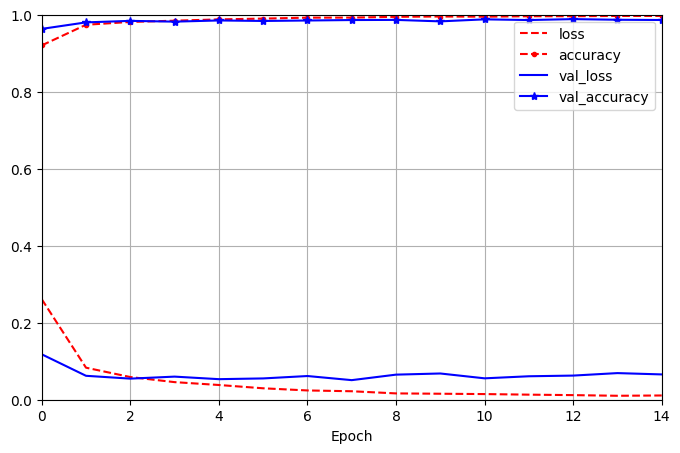

In [98]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 14], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()


In [99]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'ImageId': range(1, len(y_pred) + 1),
    'Label': y_pred
})

In [100]:
# Save to CSV, without the index column
submission.to_csv('Con2D_submission.csv', index=False)

The received a score of 98.292% on sumission.  I'm going to try a much simpler version of this model taking it out of the DNN range to see how it will do.

In [101]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(10, activation='softmax')

])

In [102]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 5408)              0         
                                                                 
 dense_18 (Dense)            (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [104]:
# Fit the model
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2930 - accuracy: 0.9163 - val_loss: 0.1218 - val_accuracy: 0.9670
Epoch 2/15
1050/1050 [==============================] - 6s 5ms/step - loss: 0.1041 - accuracy: 0.9705 - val_loss: 0.0915 - val_accuracy: 0.9723
Epoch 3/15
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0722 - accuracy: 0.9798 - val_loss: 0.0787 - val_accuracy: 0.9755
Epoch 4/15
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0581 - accuracy: 0.9834 - val_loss: 0.0657 - val_accuracy: 0.9789
Epoch 5/15
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0488 - accuracy: 0.9856 - val_loss: 0.0677 - val_accuracy: 0.9787
Epoch 6/15
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0420 - accuracy: 0.9877 - val_loss: 0.0728 - val_accuracy: 0.9780
Epoch 7/15
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0356 - accuracy: 0.9895 - val_loss: 0.0658 - val_accuracy:

In [105]:
# Predict on test set
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

875/875 [==============================] - 2s 2ms/step


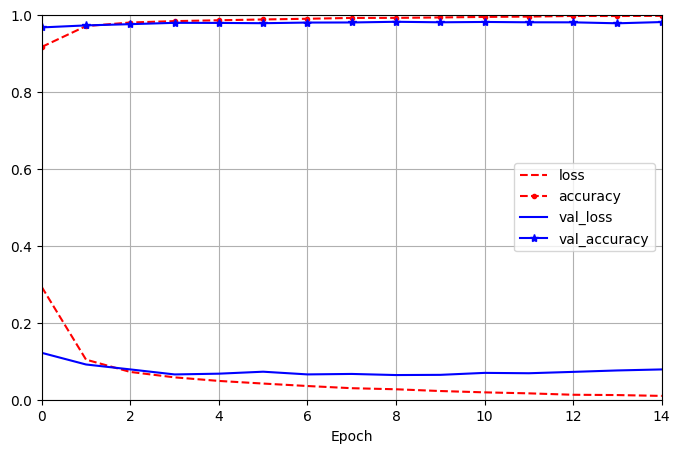

In [106]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 14], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()


In [107]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'ImageId': range(1, len(y_pred) + 1),
    'Label': y_pred
})

In [108]:
# Save to CSV, without the index column
submission.to_csv('Simple_Con2D_submission.csv', index=False)

97.935%

# Adding Gradient Clipping

I know the goal is to learn, and not to get a great kaggle score, but it's hard to resist the temptation to strive for that higher score.   

In [110]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [111]:
# Create the Model

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')

])

In [112]:
# Initalize the Adam optimizer with gradient clipping
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)

In [113]:
# Compiling the model with the optomizer
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [114]:
# Setting up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [115]:
# Setting up ReducelROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

In [117]:
# Fit the model with callbacks
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1050/1050 [==============================] - 10s 9ms/step - loss: 0.2634 - accuracy: 0.9183 - val_loss: 0.0941 - val_accuracy: 0.9701 - lr: 0.0010
Epoch 2/50
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0797 - accuracy: 0.9754 - val_loss: 0.0713 - val_accuracy: 0.9768 - lr: 0.0010
Epoch 3/50
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0580 - accuracy: 0.9818 - val_loss: 0.0612 - val_accuracy: 0.9826 - lr: 0.0010
Epoch 4/50
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0423 - accuracy: 0.9867 - val_loss: 0.0610 - val_accuracy: 0.9807 - lr: 0.0010
Epoch 5/50
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.0615 - val_accuracy: 0.9832 - lr: 0.0010
Epoch 6/50
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.0486 - val_accuracy: 0.9874 - lr: 0.0010
Epoch 7/50
1050/1050 [==============================] - 9

In [118]:
# Predict on test set
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

875/875 [==============================] - 3s 3ms/step


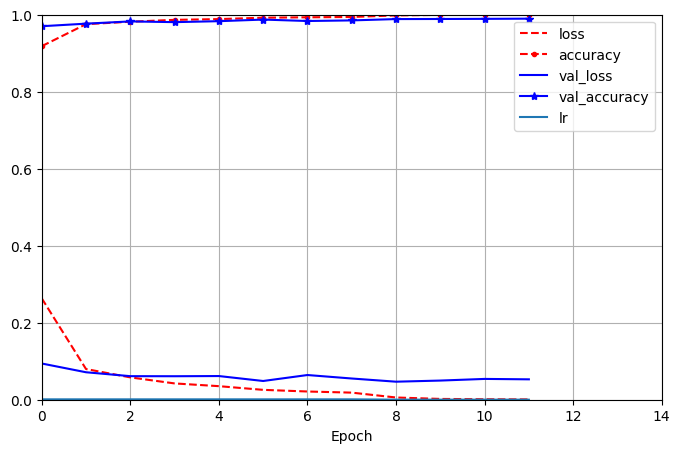

In [119]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 14], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [120]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'ImageId': range(1, len(y_pred) + 1),
    'Label': y_pred
})

In [121]:
# Save to CSV, without the index column
submission.to_csv('Clipping_EarlyStop_submission.csv', index=False)

Accuracy was 98.742% giving me a rank of 801 on this kaggle competition.